In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3607).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3961).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3958).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3643).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4088).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3679).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3506).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4161).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(4121).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3534).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3596).jpg
/kaggle/input/chest-xray-covid19-pneumonia/Data/test/PNEUMONIA/PNEUMONIA(3460).jpg
/kag

In [2]:
import tensorflow

In [3]:
from keras.preprocessing import image

In [4]:
X_train=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,
                                shear_range=0.2)

In [5]:
X_train=X_train.flow_from_directory('/kaggle/input/chest-xray-covid19-pneumonia/Data/train',
                                   target_size=(256,256),batch_size=1,class_mode='categorical')

Found 5144 images belonging to 3 classes.


In [6]:
X_test=image.ImageDataGenerator(rescale=1/255,horizontal_flip=True,zoom_range=0.2,
                                shear_range=0.2)

In [7]:
X_test=X_test.flow_from_directory('/kaggle/input/chest-xray-covid19-pneumonia/Data/test',
                                 target_size=(256,256),batch_size=1,class_mode='categorical')

Found 1288 images belonging to 3 classes.


In [8]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,BatchNormalization
from keras.layers import Dense,Dropout,Flatten,Activation

In [9]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3),padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Dropout(0.20))
model.add(Conv2D(24,(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.20))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.30))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 dropout (Dropout)           (None, 256, 256, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 24)      6936      
                                                                 
 conv2d_3 (Conv2D)           (None, 256, 256, 64)      13888     
                                                        

In [10]:
xraymodel=model.fit(X_train,epochs=10,batch_size=128,validation_data=(X_test))

Epoch 1/10


2023-03-24 04:54:13.346092: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


5144/5144 [==============================] - 315s 59ms/step - loss: 1.2022 - accuracy: 0.7329 - val_loss: 0.5469 - val_accuracy: 0.7989
Epoch 2/10
5144/5144 [==============================] - 268s 52ms/step - loss: 0.4716 - accuracy: 0.8270 - val_loss: 0.4575 - val_accuracy: 0.8455
Epoch 3/10
5144/5144 [==============================] - 269s 52ms/step - loss: 0.4325 - accuracy: 0.8468 - val_loss: 0.5106 - val_accuracy: 0.8075
Epoch 4/10
5144/5144 [==============================] - 268s 52ms/step - loss: 0.4398 - accuracy: 0.8519 - val_loss: 0.4601 - val_accuracy: 0.8183
Epoch 5/10
5144/5144 [==============================] - 265s 52ms/step - loss: 0.3796 - accuracy: 0.8635 - val_loss: 0.3171 - val_accuracy: 0.8843
Epoch 6/10
5144/5144 [==============================] - 265s 52ms/step - loss: 0.3526 - accuracy: 0.8717 - val_loss: 0.4213 - val_accuracy: 0.8680
Epoch 7/10
5144/5144 [==============================] - 267s 52ms/step - loss: 0.3436 - accuracy: 0.8762 - val_loss: 0.3453 - val

In [11]:
import matplotlib.pyplot as plt

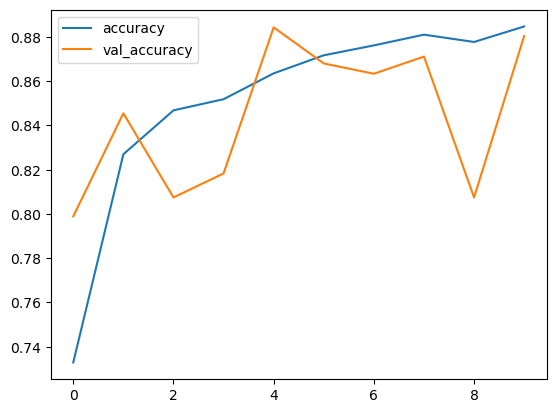

In [17]:
plt.plot(xraymodel.history['accuracy'],label='accuracy')
plt.plot(xraymodel.history['val_accuracy'],label='val_accuracy')
plt.legend()